# Understanding Why Borrowers Default: Analysis of Prosper Loan Data.
## by Olatunji Olarewaju

## Investigation Overview

In this investigation, I looked into why borrowers may default on loans.In particular, I examined the features known about the borrowers pre-loan application, such as, income ranges, credit score and available bank card credit of the borrowers. Their relationship with interest rates were then investigated in pairs and and combined to understand what makes borrowers defaulton loans.  


## Dataset Overview
The data has the status of each of the 113,937 loans including, information such as the amount borrowed, the date, and some borrower's features such as income ranges and employment status. The data covered a period of 10 years, between 2005-2014.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("prosperLoanData.csv")

## Proportion of the Repayment Outcome 

- Payments are still ongoing for approximately 50% of the Borrowers.

- And,about 32% have completed payments. 

- While much of the remaining 18% have either defaulted on payments for varied  periods of time or are chargedoff — hopes of the borrowers paying are unlikely. 

- Based on this distribution, not less than 10% of the Borrowers have completely ceased payments of their debt.


In [ ]:
#Loan status
fig, ax = plt.subplots(figsize=(14, 8)) 
loan_status= df.LoanStatus.value_counts(normalize=True).reset_index()
loan_status.columns = ["Loan Status", "Proportion"]
sb.barplot(
    x="Loan Status",
    y= "Proportion",
    ax=ax,
    data=loan_status, 
    color = sb.color_palette()[0])
plt.title("Borrowers' Loan Status Proportion");
#plt.xticks(rotation =90);


## Knowing Why Borrowers Take Loans

- Nearly a half of the borrowers took loans for varied reasons, natably, to finance business, improve home and for other reasons not stated.

- The majority of the borrowers however, took Prosper loan to consolidate other debt. 

- Debt consolidation involves taking a new loan to pay off outstanding debts.


In [10]:
# Conversion of the numeric values to their categorical values.
keys = ['Not Available', 'Debt Consolidation', 'Home Improvement','Business', 'Personal Loan', 'Student Use', 'Auto','Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 'R$V', 'Taxes', 'Vacation', 'Wedding Loans']
dic = { i:keys[i] for i in np.arange(len(keys))}
#print(dic)
df['ListingCategory (numeric)'].replace(dic, inplace=True)


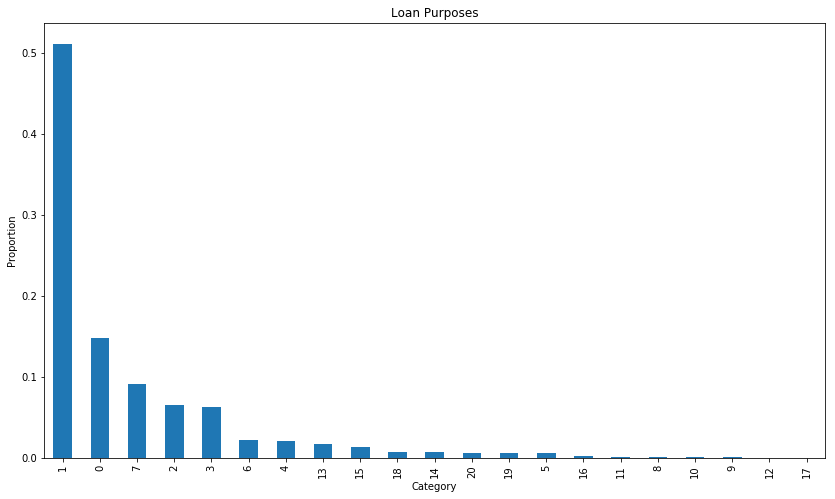

In [3]:
# Visualing the proportion of stated reasons for taking a loan 
fig, ax = plt.subplots(figsize=[14,8])
df['ListingCategory (numeric)'].value_counts(normalize=True).plot(kind = "bar", ax = ax, color = sb.color_palette()[0])
plt.title("Loan Purposes")
plt.xlabel("Category")
plt.ylabel("Proportion");



## Distribution of interest rate for the loans

- The distribution is slightly right skewed 

- The charged interest rates are between 0 to 40%

- Prominent spikes at certain rates particularly towards an increasing interest rate.

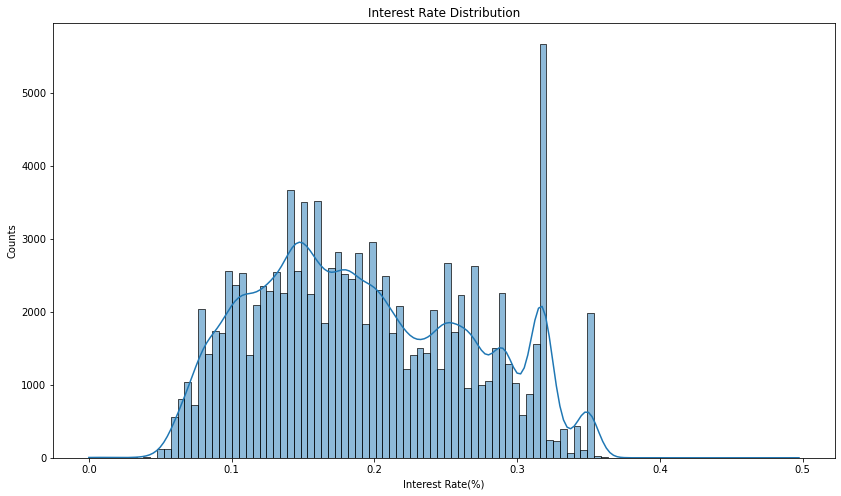

In [10]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
# Distribution of interest rate for the loans
fig, ax = plt.subplots(figsize=[14,8])
sb.histplot(data=df, x="BorrowerRate",ax=ax, kde=True)
plt.xlabel("Interest Rate(%)")
plt.ylabel("Counts")
plt.title("Interest Rate Distribution");


## Relationship Between Bank Card Credit, Credit Score Ranges and Interest Rates

- The following regression plot indicates a negative correlation between interest rates and bank credit and credit score range. 

- Correspondingly, an increasing credit score or bank credit lead to a relatively decrease in charged interest rate on Prosper loans. 

In [11]:
# Subset of the loan status
df_loanstatus = df[(df['LoanStatus']== 'Completed') | (df['LoanStatus']== 'Defaulted') | (df['LoanStatus']== 'Chargedoff')]
df_loanstatus["years"] = pd.DatetimeIndex(df_loanstatus['LoanOriginationDate']).year
#df_loanstatus.LoanStatus.unique()


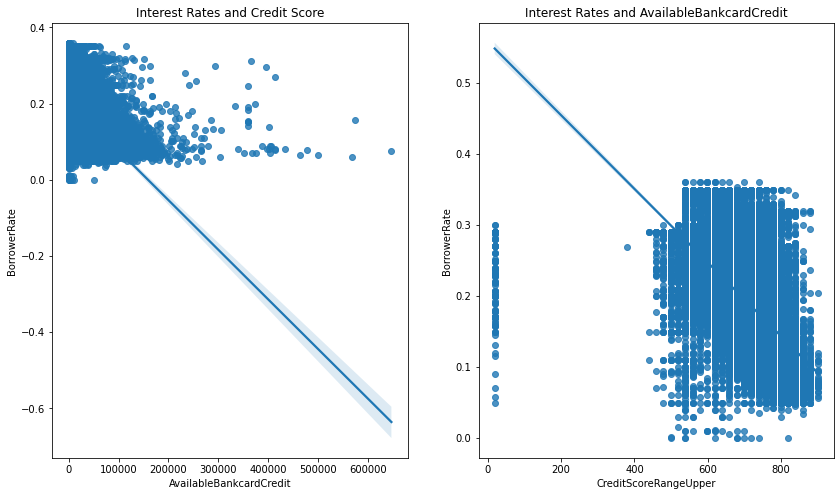

In [41]:
cor_plot = ["AvailableBankcardCredit", "CreditScoreRangeUpper"]
title = ["Interest Rates and Credit Score", "Interest Rates and AvailableBankcardCredit"]
fig, ax = plt.subplots(1,2, figsize=(14, 8))
for i in range(2):
    sb.regplot(data =df,
               y = "BorrowerRate",
               x = cor_plot[i],
               color = sb.color_palette()[0],
               ax = ax[i])
    ax[i].set_title(title[i]);



## Bank Card Credit,  Interest Rates and Loan Status 

- Generally, the plots suggest that the borrowers with less than 50,000 dollars in available bank card credit as very likely to default on loans or be chargedoff. 

- It is thus evident why interest rates are high for these category of debtors, at 20% and above. They may likely represent high risk category of borrowers.

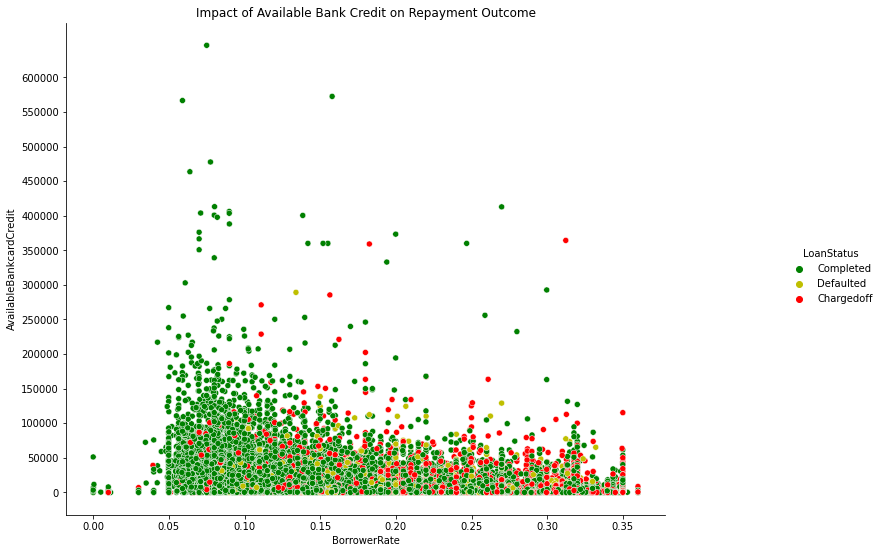

In [45]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
#fig, ax = plt.subplots(figsize=(14, 8)) 
credit=sb.relplot(data = df_loanstatus, 
           x = "BorrowerRate", 
           y = "AvailableBankcardCredit", 
           hue = "LoanStatus",
           palette=["g", "y", "r"])
plt.yticks(np.arange(0,650000, 50000))
plt.title("Impact of Available Bank Credit on Repayment Outcome")
credit.fig.set_size_inches(14, 8);


## Loan Status, Interest Rate and Credit Score Ranges

- This plot further demonstrates the underlying factors for which borrowers may default on loans. 

- Much of the defaulters or chargedoff borrowers have comparatively lower credit score, usually less than 650.

- And nearly none of the borrowers with less than 100 credit score completely repaid back their loans.

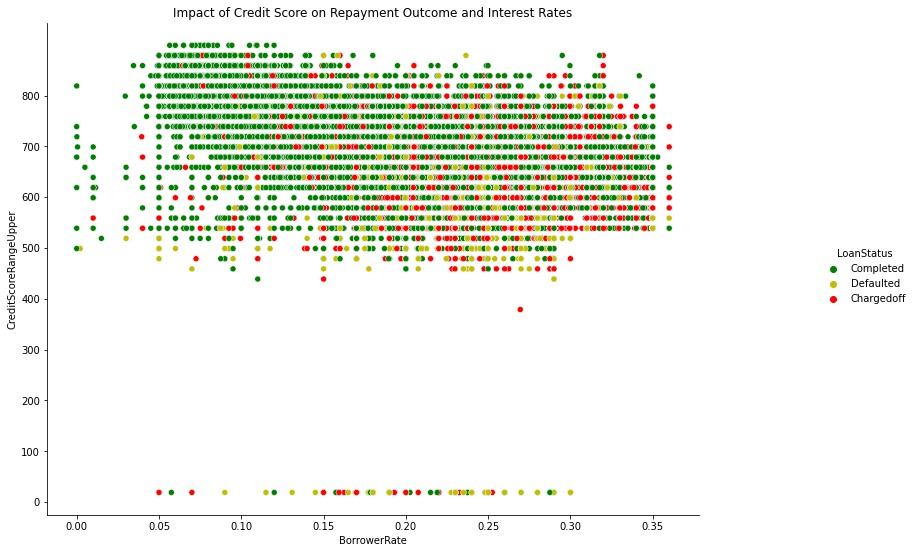

In [44]:
"""This code may require seaborn upgrade (pip install -U seaborn)"""
score = sb.relplot(data = df_loanstatus, 
           x = "BorrowerRate", 
           y = "CreditScoreRangeUpper", 
           hue = "LoanStatus",  
           palette=["g", "y", "r"])
plt.yticks(np.arange(0,900,100));
plt.title("Impact of Credit Score on Repayment Outcome and Interest Rates")
score.fig.set_size_inches(14, 8);


## Conclusion 

The investigation revealed that borrowers are likely to delay payment, default or cease repayment if the are in the category of borrowers with less than 640 credit score and have less than 50,000 dollars in bank card credit available to them.


In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt